In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

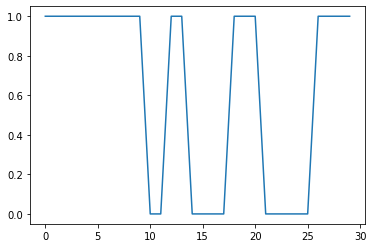

In [66]:
pdd = 0.7
pww = 0.85
transition = [[pdd, 1-pdd], [1-pww, pww]]

### get wet/dry states
states = [1]
for y in range(29):
    states.append(np.random.choice([0,1], p=transition[states[-1]]))
plt.plot(states)

In [84]:
### get revenues
mus = [0,2]
stds = [0.5, 0.5]
revs = []
for s in states:
    revs.append(np.random.normal(mus[s], stds[s]))

In [109]:
revs = np.array(revs)
states = np.array(states)

### get hedged revs
hedged = revs - 0.8
hedged[states == 0] += 1.8

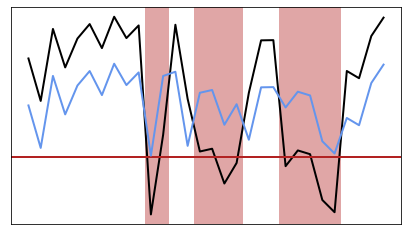

In [110]:
### plot
fig, ax = plt.subplots(1,1, figsize=(7,4))
# plt.axhline(np.mean(revs), c='k', lw=2)
plt.plot(revs, c='k', lw=2)
plt.axhline(0.1, c='firebrick', lw=2)
plt.plot(hedged, color = 'cornflowerblue', lw=2)

### plot drought
for x, s in enumerate(states):
    if s == 0:
        plt.axvspan(x - 0.5, x + 0.5, color='firebrick', alpha=0.4, lw=0)
        

_=plt.xticks([])
_=plt.yticks([])

plt.savefig('figures/' + 'defense_riskmgmt_4.png', bbox_inches='tight', dpi=500)